# Testing simple `bindsnet` functionality

## Imports and utils

In [1]:
import torch
import os, sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join('..', '..', 'bindsnet')))
sys.path.append(os.path.abspath(os.path.join('..', '..', 'bindsnet', 'network')))

from network     import Network
from connections import Connection
from nodes       import McCullochPitts, Input

%matplotlib inline

## Construct simple network

In [2]:
network = Network(dt=1.0)  # Initialize network

That was easy!

### Add layer of McCulloch-Pitts (MP) neurons

In [3]:
n_neurons = 25

# Create layer of `n_neurons` McCulloch-Pitts neurons and add it to the network
mp_layer = McCullochPitts(n=n_neurons, traces=False, threshold=2.0)  
network.add_layer(mp_layer, name='A')

### Add input layer

In [4]:
n_input = 25

# Create layer of `n_input` input neurons and add it to the network
input_layer = Input(n=n_input)
network.add_layer(input_layer, name='X')

### Check properties of network

In [5]:
print(network.layers)
print()

print('No. of neurons in layer A:', network.layers['A'].n)
print('Spike traces in layer A?', network.layers['A'].traces)
print('Threshold of neurons in layer A:', network.layers['A'].threshold)
print('Spike occurrence vector of layer A:', network.layers['A'].s.numpy())
print()

print('No. of neurons in layer X:', network.layers['X'].n)
print('Spike traces in layer X?', network.layers['X'].traces)
print('Spike occurrence vector of layer X:', network.layers['X'].s.numpy())

{'A': <nodes.McCullochPitts object at 0x7fe9c04de048>, 'X': <nodes.Input object at 0x7fe9c04de470>}

No. of neurons in layer A: 25
Spike traces in layer A? False
Threshold of neurons in layer A: 2.0
Spike occurrence vector of layer A: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]

No. of neurons in layer X: 25
Spike traces in layer X? False
Spike occurrence vector of layer X: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### Add connection from input to MP layer

In [6]:
w = torch.rand(input_layer.n, mp_layer.n)  # Create random uniform weight matrix between layers.

# Create connection object from input to MP layer with specified weights.
connection = Connection(input_layer, mp_layer, update_rule=None, w=w)
network.add_connection(connection, source='X', target='A')

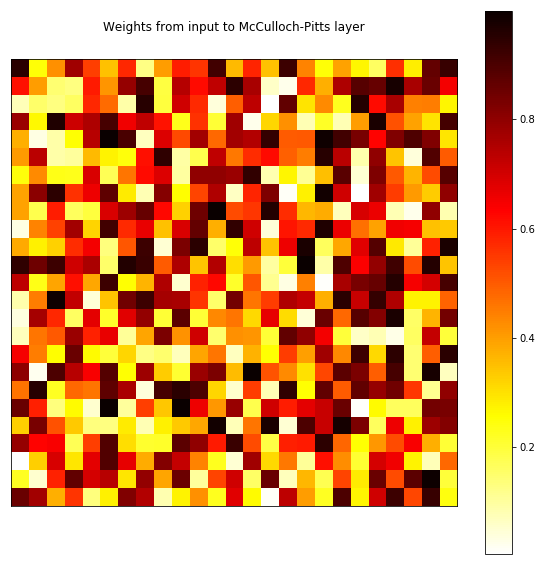

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))

im = ax.matshow(w.numpy(), cmap='hot_r')
ax.set_xticks(()); ax.set_yticks(()); plt.colorbar(im)
ax.set_title('Weights from input to McCulloch-Pitts layer');

## Run simple network simulation

### Create network input

In [8]:
time = 100  # Simulation time
p_fire = 0.1  # Bernoulli probability of input neuron spiking

# Input spikes are Bernoulli experiments with spike prob. `p_fire`.
inpt = np.random.binomial(1, p_fire, [n_input, time])
inpt = torch.from_numpy(inpt)

### Run network simulation

In [9]:
output = network.run(inpts={'X' : inpt}, time=100)

### Inspect network input / output

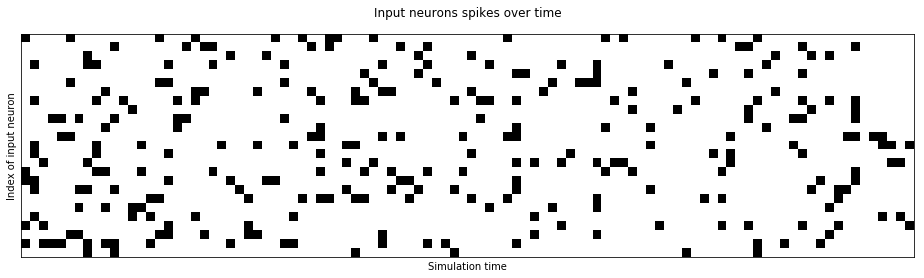

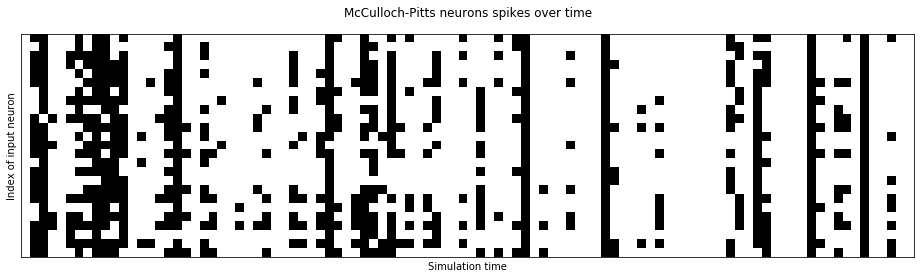

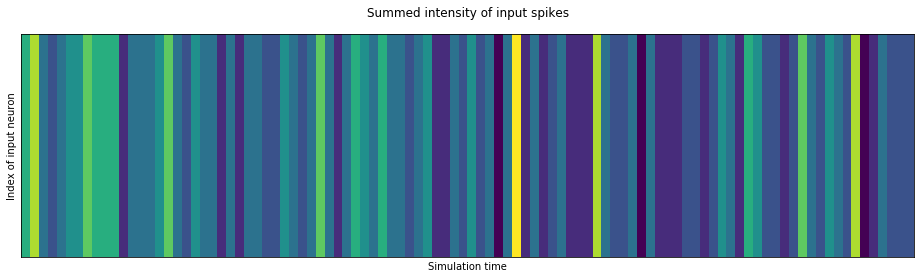

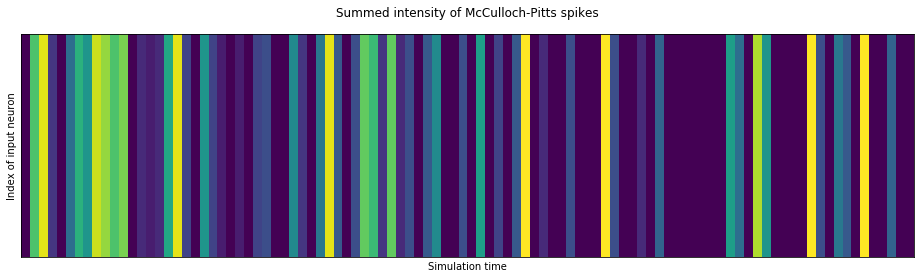

In [10]:
inpt_spikes = output['X'].numpy()
mp_spikes = output['A'].numpy()

plt.matshow(inpt_spikes, cmap='binary');
plt.xticks(()); plt.yticks(());
plt.xlabel('Simulation time'); plt.ylabel('Index of input neuron');
plt.title('Input neurons spikes over time');

plt.matshow(mp_spikes, cmap='binary')
plt.xticks(()); plt.yticks(())
plt.xlabel('Simulation time'); plt.ylabel('Index of input neuron')
plt.title('McCulloch-Pitts neurons spikes over time')

plt.matshow(np.stack([inpt_spikes.sum(axis=0)] * 25))
plt.xlabel('Simulation time'); plt.ylabel('Index of input neuron')
plt.title('Summed intensity of input spikes')
plt.xticks(()); plt.yticks(());

plt.matshow(np.stack([mp_spikes.sum(axis=0)] * 25))
plt.xlabel('Simulation time'); plt.ylabel('Index of input neuron')
plt.title('Summed intensity of McCulloch-Pitts spikes')
plt.xticks(()); plt.yticks(());